# Fine-tuning Results Analysis

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../multi_labels_metrics.csv")
print(list(df.columns))

['Unnamed: 0', 'model_name', 'fold', 'data_type', 'loss_type', 'run', 'f1', 'accuracy', 'tp', 'fp', 'tn', 'fn', 'f1_IAS', 'f1_SUA', 'f1_VA', 'f1_weighted', 'f1_macro', 'f1_micro', 'recall_IAS', 'recall_SUA', 'recall_VA', 'recall_weighted', 'recall_macro', 'recall_micro', 'precision_IAS', 'precision_SUA', 'precision_VA', 'precision_weighted', 'precision_macro', 'precision_micro']


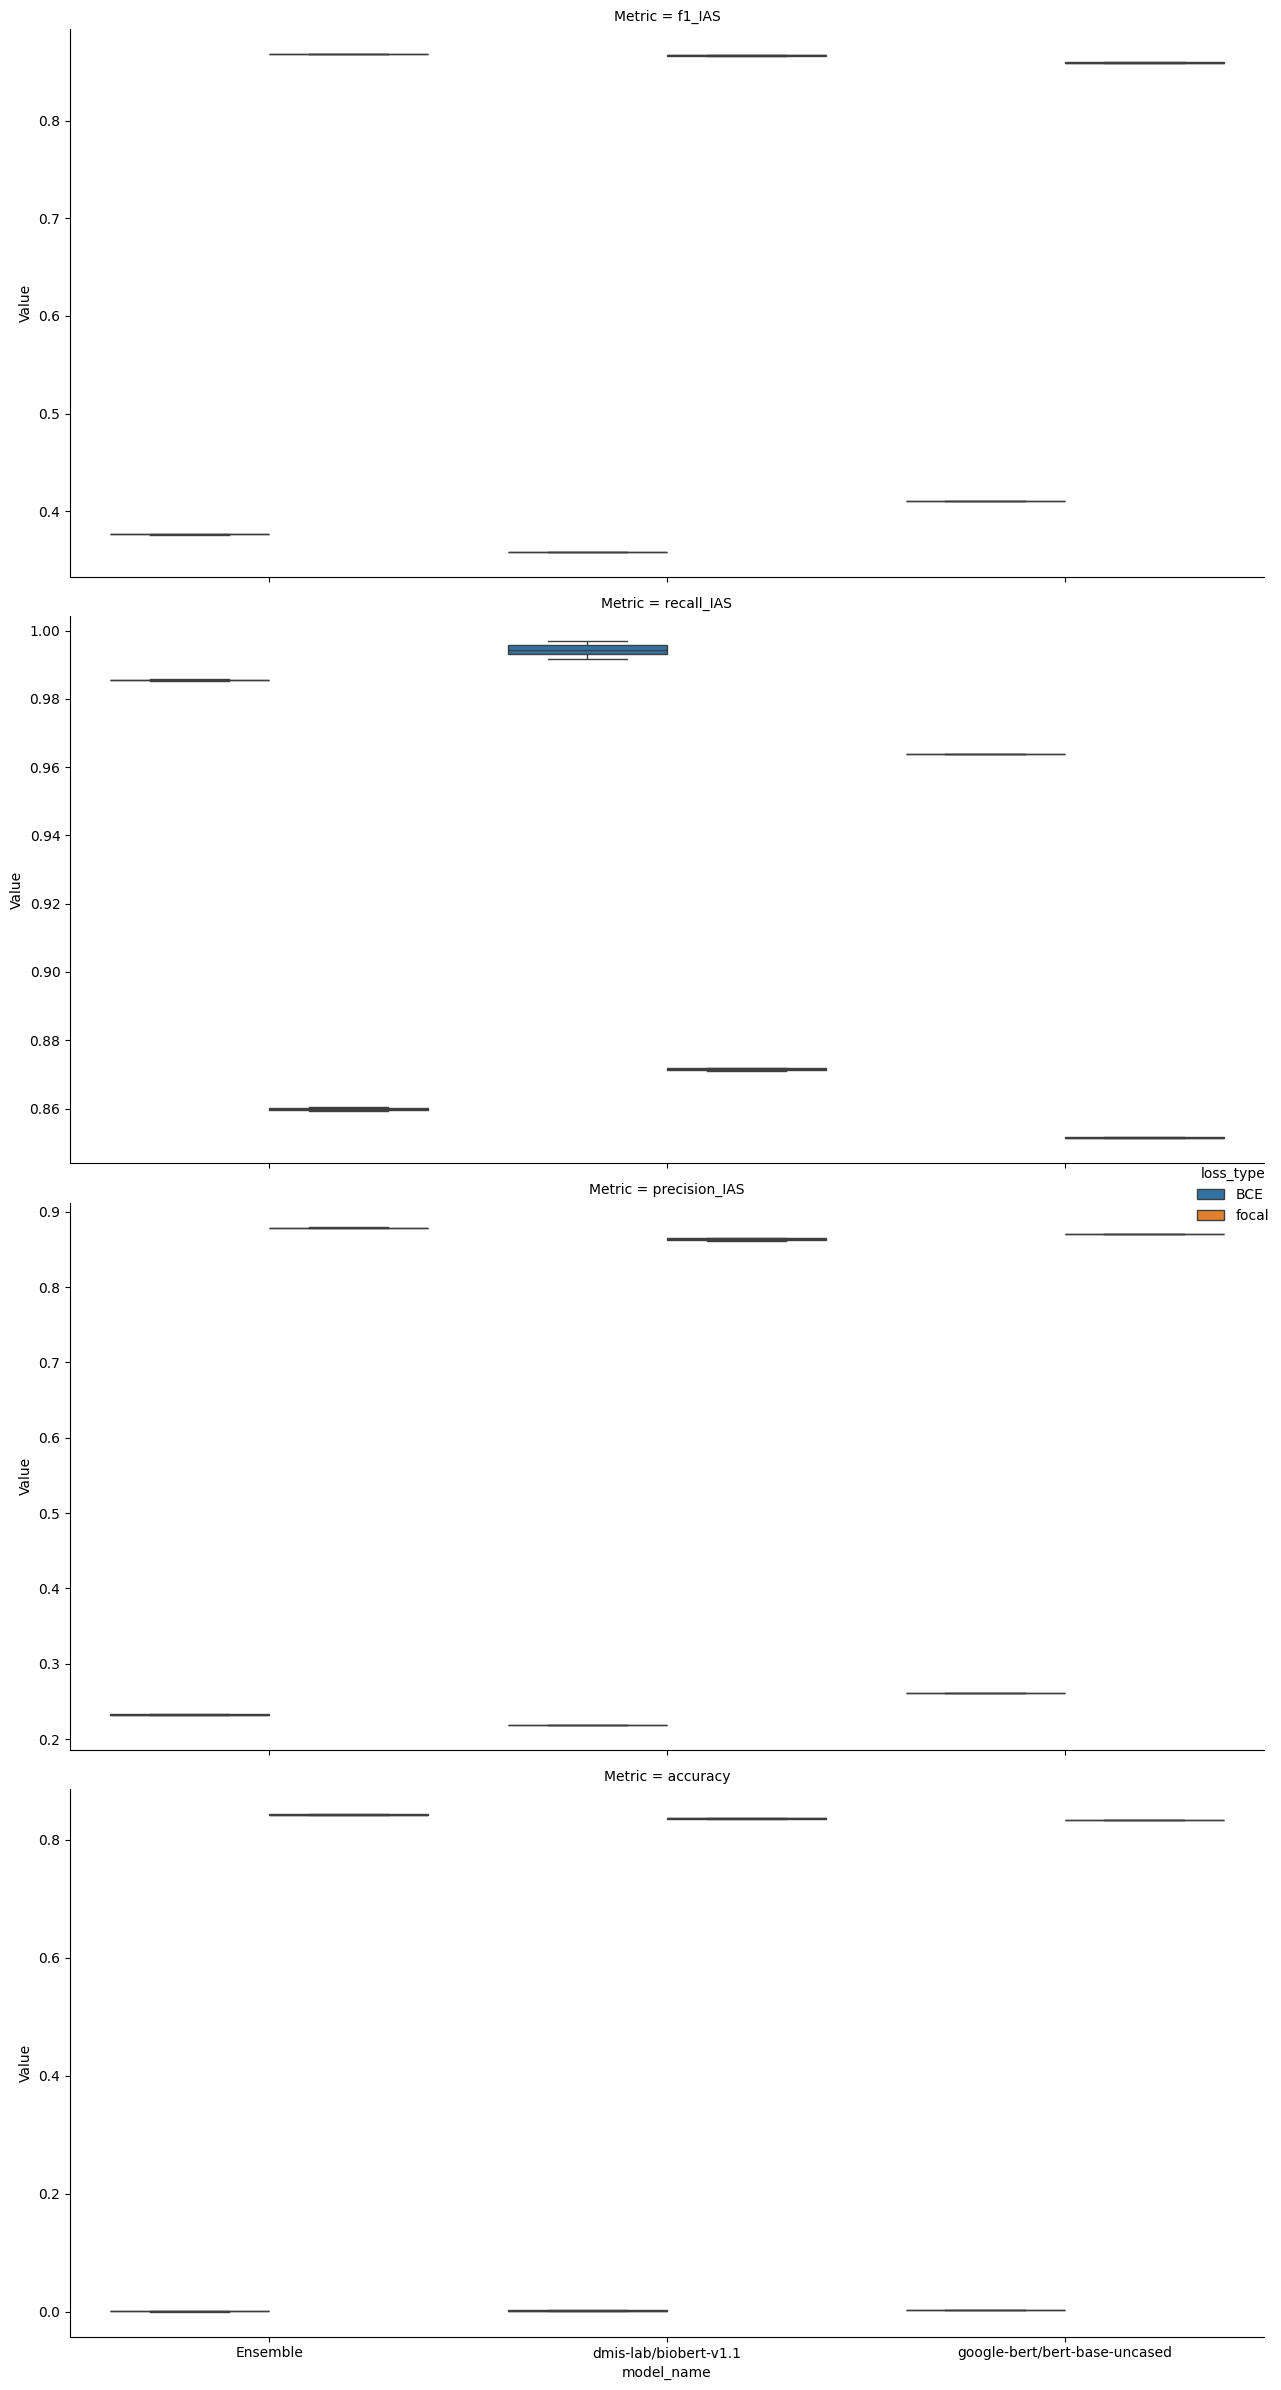

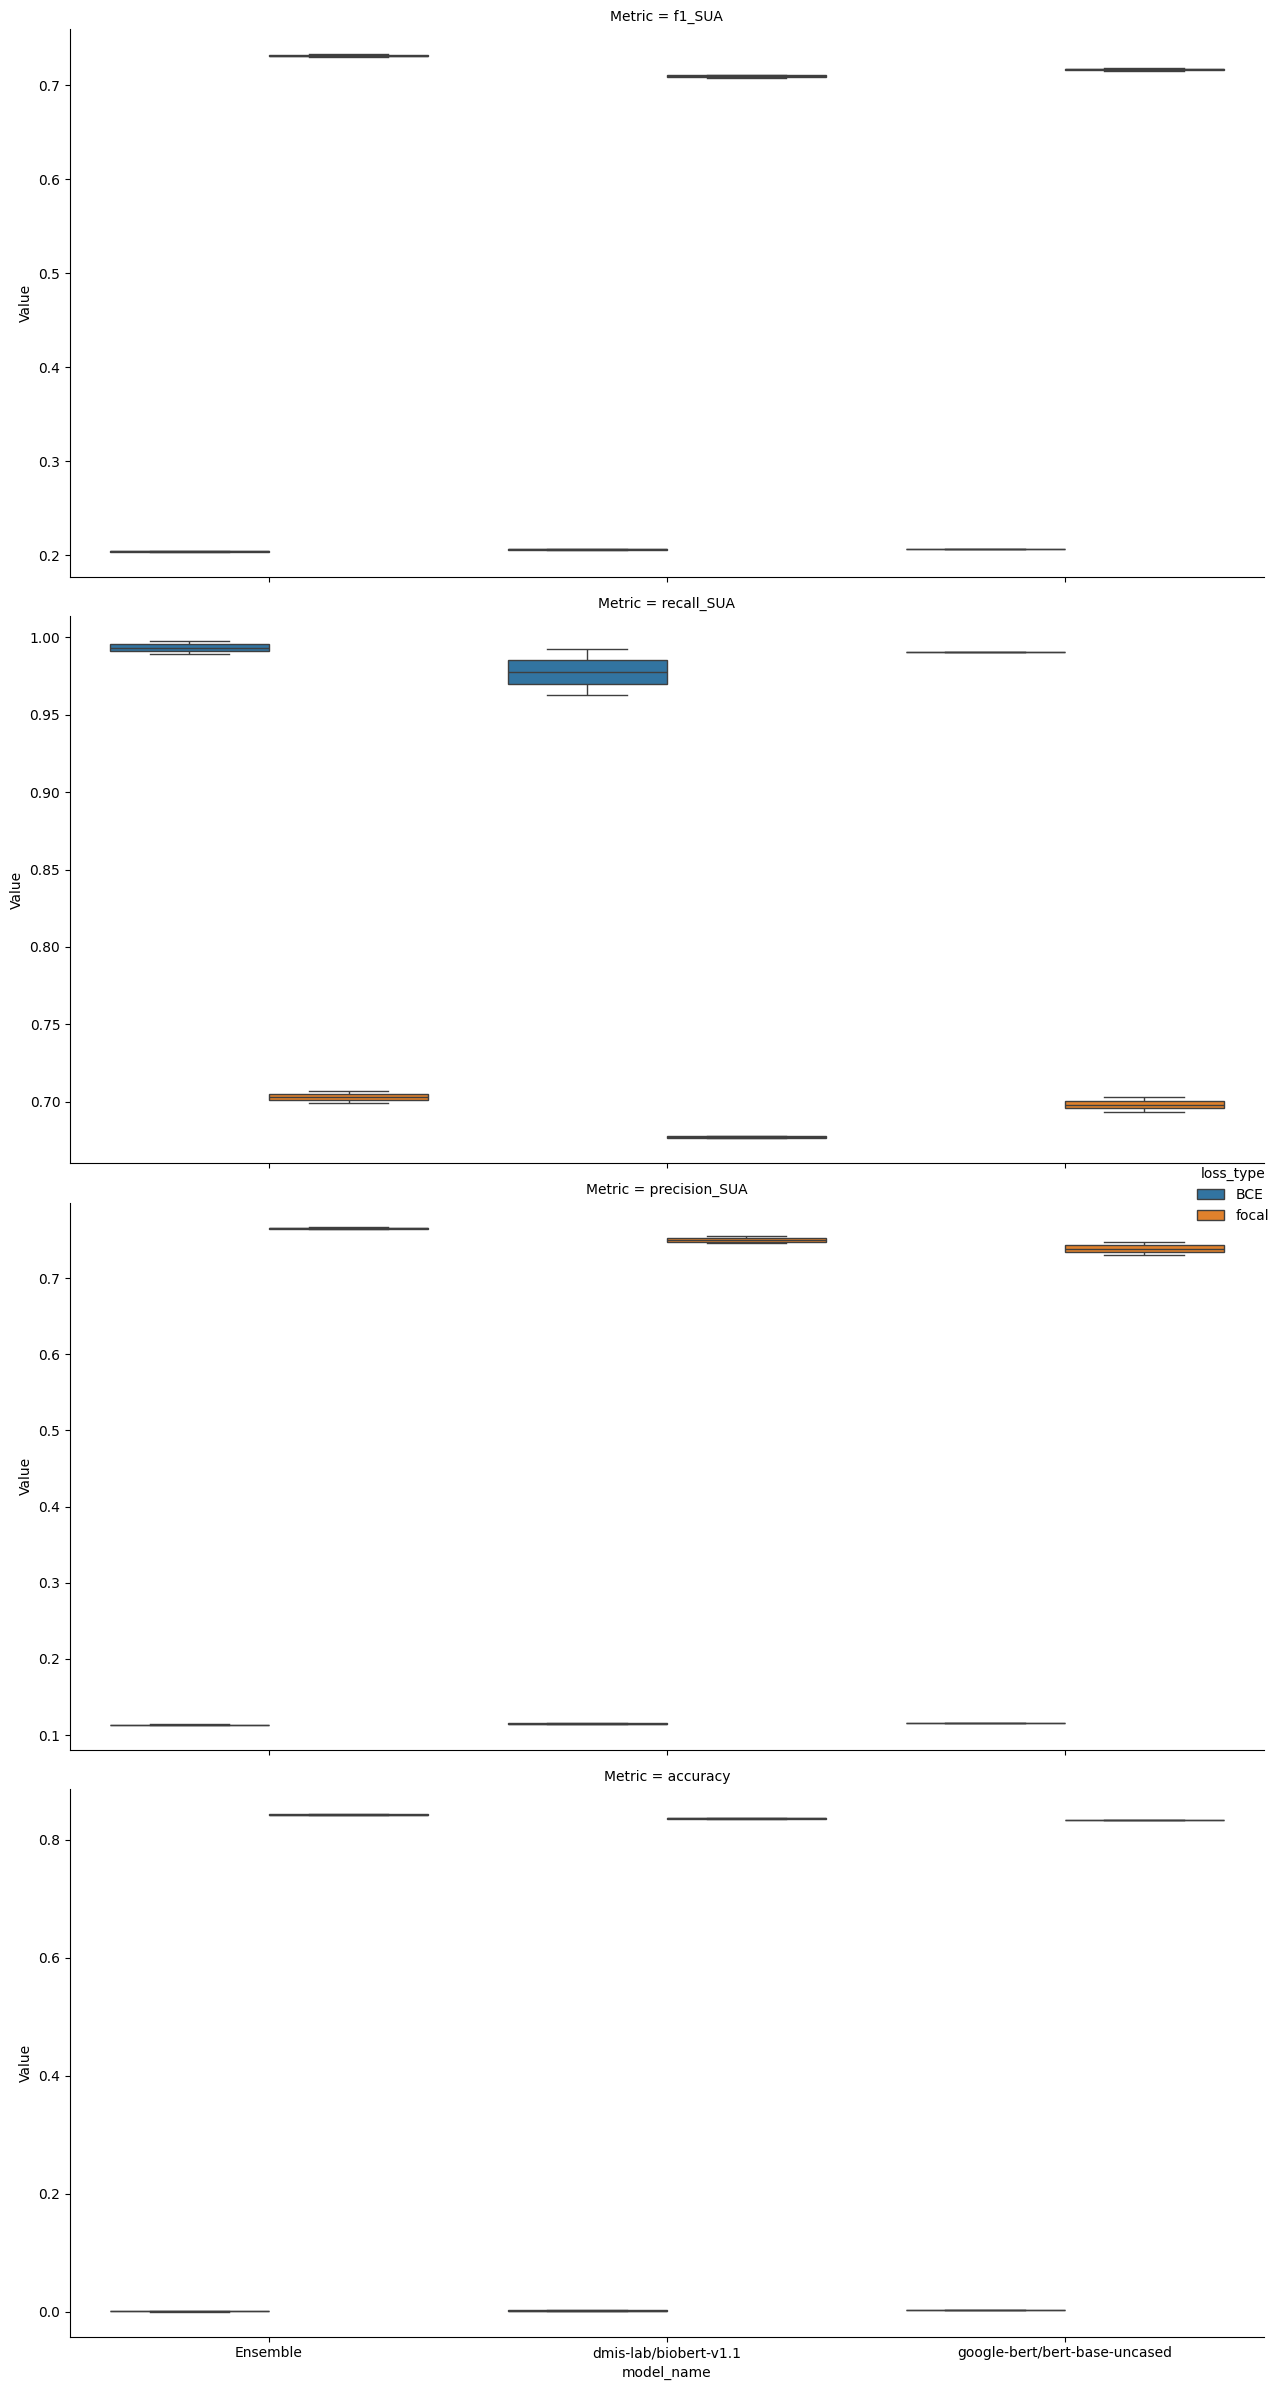

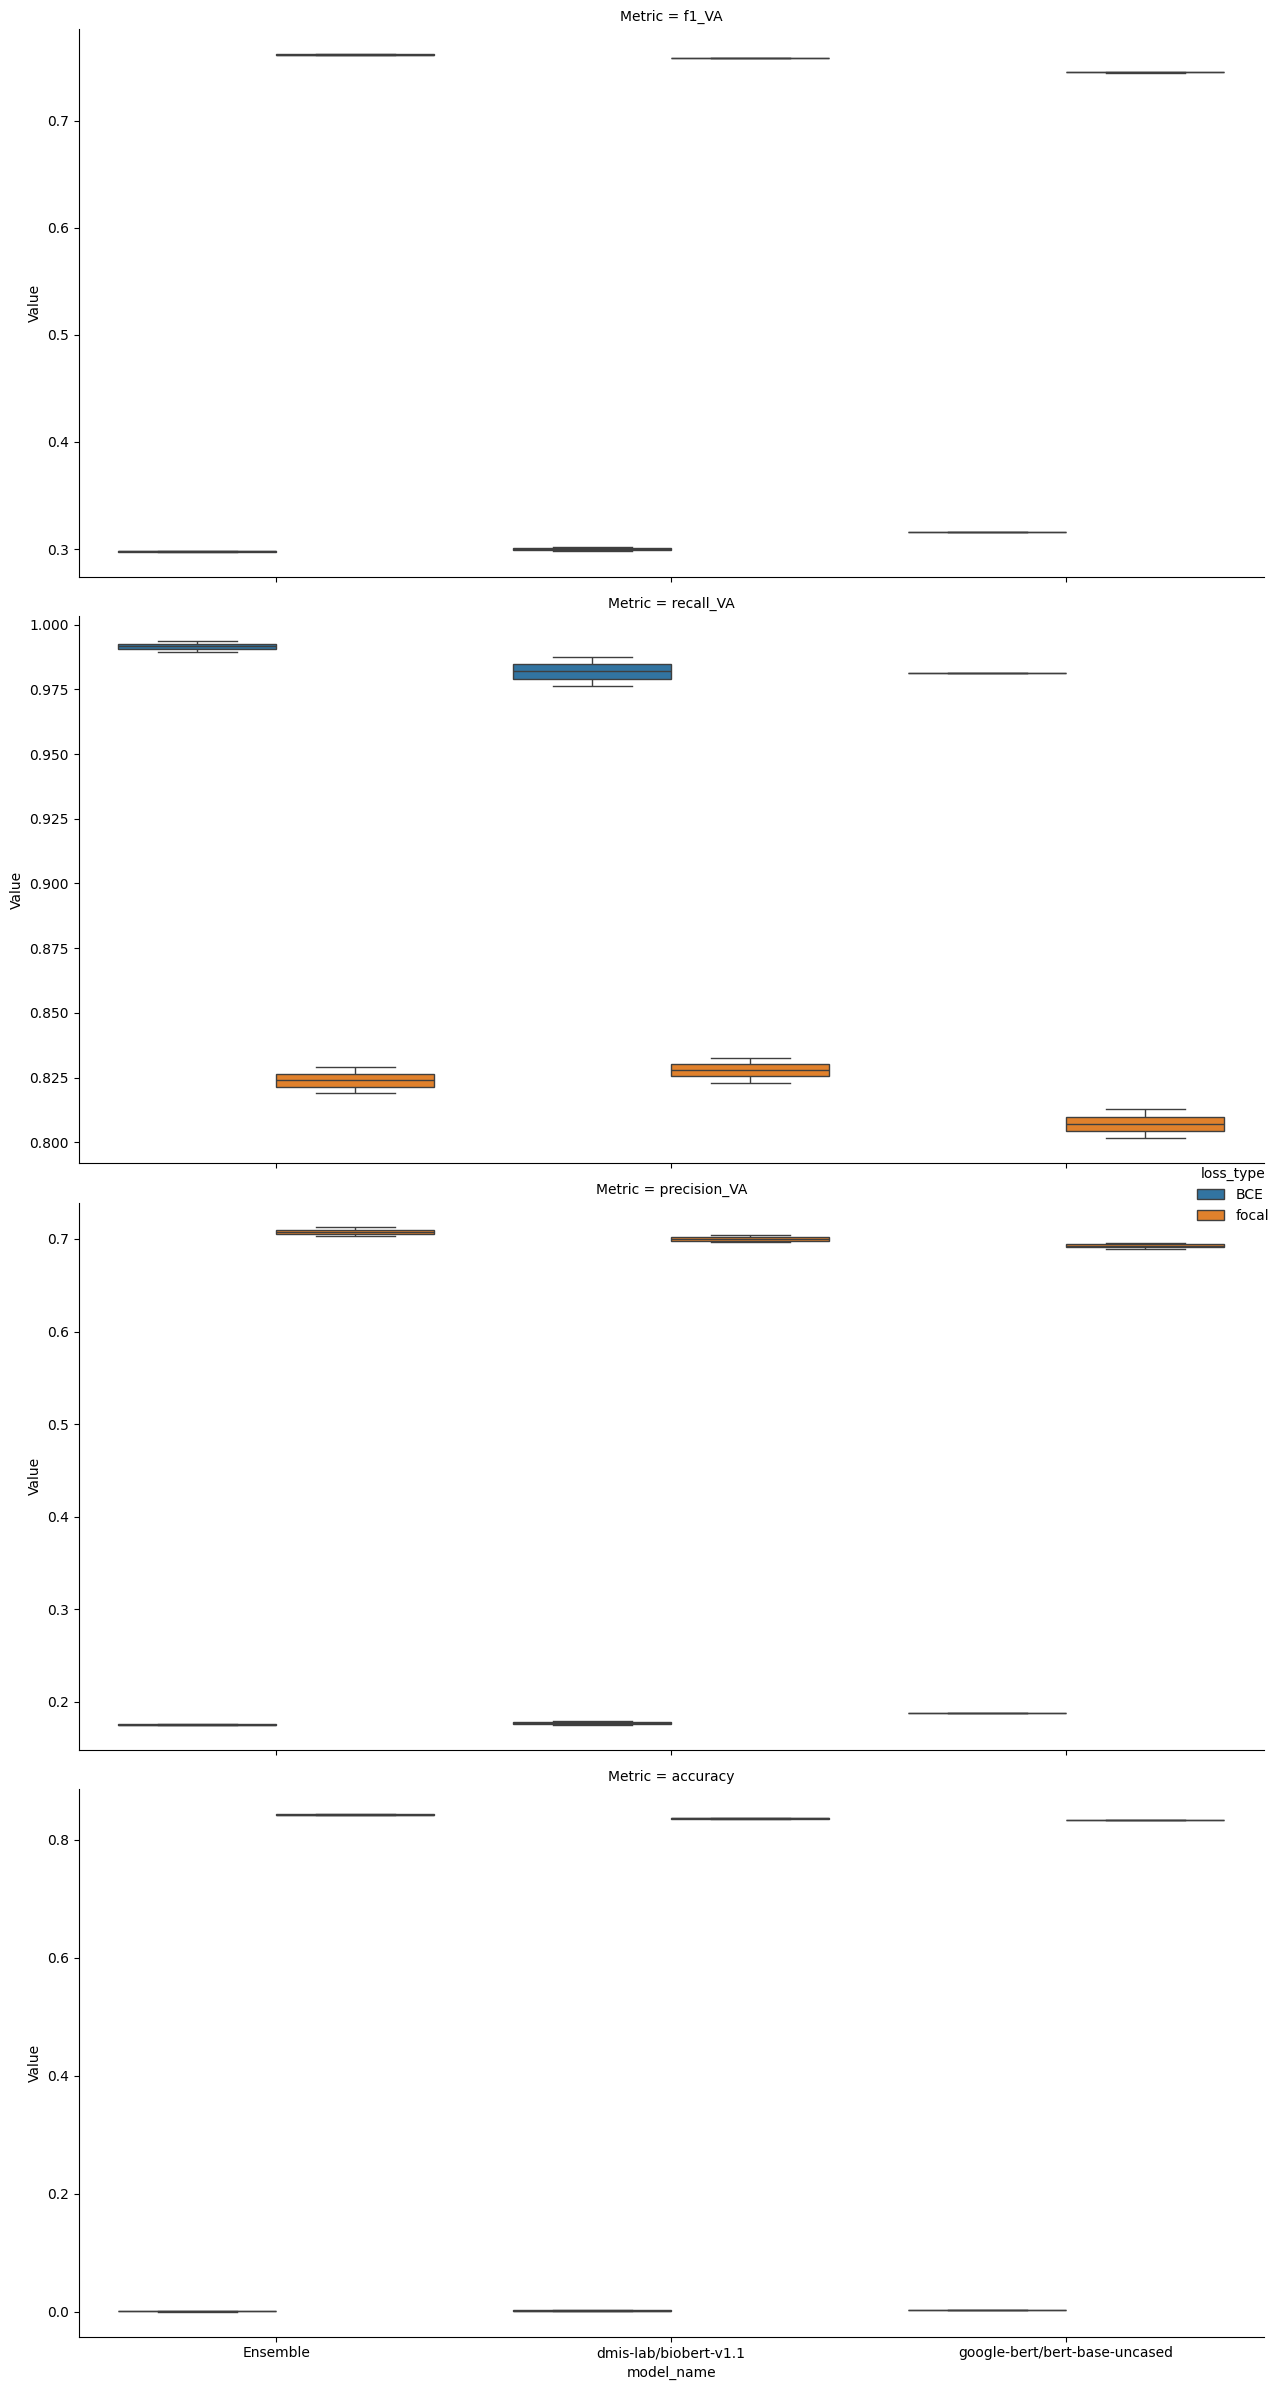

In [12]:
def plot_models_actual_perfs(result_metrics,loss_type,comp_loss=False, plot_name="models_metrics_comp"):
        #TODO : Compare perfs with a baseline pre-trained model and an SVM (add functions for this)
        """
        Plots metrics distribution across runs for the last configuration/training.
        """
        for data_type in ["IAS","SUA","VA"]:
            # Group by relevant columns and calculate mean metrics
            avg_metrics = result_metrics.groupby(
                ["data_type", "loss_type", "model_name", "run"]
            )[[
                'accuracy','f1_IAS','f1_SUA', 'f1_VA', 'f1_weighted', 'f1_macro', 'f1_micro', 'recall_IAS', 'recall_SUA', 'recall_VA', 'recall_weighted', 'recall_macro', 'recall_micro', 'precision_IAS', 'precision_SUA', 'precision_VA', 'precision_weighted', 'precision_macro','precision_micro'
               ]].mean().reset_index()
            # Filter metrics for the current data_type and loss_type
            if comp_loss:
                filtered_metrics = avg_metrics
            else:
                filtered_metrics = avg_metrics[
                (avg_metrics["loss_type"] == loss_type)
            ]

            # Create a boxplot for each metric
            melted_metrics = filtered_metrics.melt(
                id_vars=["loss_type","model_name"], 
                value_vars=["f1_" + data_type, "recall_" + data_type, "precision_" + data_type, "accuracy"],
                var_name="Metric", 
                value_name="Value"
            )
            
            if comp_loss:
                sns.catplot(
                    data=melted_metrics, 
                    x="model_name", 
                    y="Value",
                    row="Metric",
                    hue="loss_type", 
                    kind="box", 
                    height=6, 
                    aspect=2,
                    sharey=False
                )
            else :
                sns.catplot(
                    data=melted_metrics, 
                    x="model_name", 
                    y="Value",
                    row="Metric",
                    kind="box", 
                    height=6, 
                    aspect=2,
                    sharey=False
                )
                
            plt.tight_layout()
            plt.show()

plot_models_actual_perfs(df, "BCE", comp_loss=True)